In [1]:
import numpy as np
import matplotlib.pyplot as plt
import logging
import time
import numpy as np
import matplotlib.pyplot as plt
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader.data import DataReader
import yfinance as yf
import tensorflow as tf
from pandas_datareader import data as pdr
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.arima.model import ARIMA
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2024-03-30 17:54:21.669425: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
com='META'
yf.pdr_override()

In [3]:
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN',"META","NFLX","AMX","JPM","TSLA","GE"]

In [4]:
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

In [5]:
for stock in tech_list:
        globals()[stock] = yf.download(stock, start, end)
        dfdc = yf.download(stock, start, end)
        dfdc.to_csv('stockdc.csv')

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [6]:
company_list = [AAPL, GOOG, MSFT, AMZN,META,NFLX,AMX,JPM,TSLA,GE]
company_name = ["APPLE", "GOOGLE", "MICROSOFT", "AMAZON","META", "NETFLIX","AMERICAN EXPR","JP-MORGAN","TESLA","GENERAL_ELC"]

In [7]:
for company, com_name in zip(company_list, company_name):
        company["company_name"] = com_name

In [8]:
df = pd.concat(company_list, axis=0)
df

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-03-30,161.529999,162.470001,161.270004,162.360001,161.497971,49501700,APPLE
2023-03-31,162.440002,165.000000,161.910004,164.899994,164.024475,68749800,APPLE
2023-04-03,164.270004,166.289993,164.220001,166.169998,165.287735,56976200,APPLE
2023-04-04,166.600006,166.839996,165.110001,165.630005,164.750610,46278300,APPLE
2023-04-05,164.740005,165.050003,161.800003,163.759995,162.890533,51511700,APPLE
...,...,...,...,...,...,...,...
2024-03-22,176.300003,177.500000,175.080002,175.149994,175.149994,5459000,GENERAL_ELC
2024-03-25,174.660004,175.509995,172.789993,173.490005,173.490005,5018500,GENERAL_ELC
2024-03-26,173.490005,175.050003,172.399994,173.550003,173.550003,4035900,GENERAL_ELC


In [9]:
df.to_csv('stock.csv')

In [10]:
dfxf = pd.read_csv("stock.csv")
dfxf

,Date,Open,High,Low,Close,Adj Close,Volume,company_name
0,2023-03-30,161.529999,162.470001,161.270004,162.360001,161.497971,49501700,APPLE
1,2023-03-31,162.440002,165.000000,161.910004,164.899994,164.024475,68749800,APPLE
2,2023-04-03,164.270004,166.289993,164.220001,166.169998,165.287735,56976200,APPLE
3,2023-04-04,166.600006,166.839996,165.110001,165.630005,164.750610,46278300,APPLE
4,2023-04-05,164.740005,165.050003,161.800003,163.759995,162.890533,51511700,APPLE
...,...,...,...,...,...,...,...,...
2505,2024-03-22,176.300003,177.500000,175.080002,175.149994,175.149994,5459000,GENERAL_ELC
2506,2024-03-25,174.660004,175.509995,172.789993,173.490005,173.490005,5018500,GENERAL_ELC
2507,2024-03-26,173.490005,175.050003,172.399994,173.550003,173.550003,4035900,GENERAL_ELC
2508,2024-03-27,175.020004,180.360001,174.679993,180.119995,180.119995,10061000,GENERAL_ELC


In [11]:
#skipping one company here initially hardcoding will send dynamically later
com='META'
df_rest = df[df['company_name']!=com]
df_rest

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-03-30,161.529999,162.470001,161.270004,162.360001,161.497971,49501700,APPLE
2023-03-31,162.440002,165.000000,161.910004,164.899994,164.024475,68749800,APPLE
2023-04-03,164.270004,166.289993,164.220001,166.169998,165.287735,56976200,APPLE
2023-04-04,166.600006,166.839996,165.110001,165.630005,164.750610,46278300,APPLE
2023-04-05,164.740005,165.050003,161.800003,163.759995,162.890533,51511700,APPLE
...,...,...,...,...,...,...,...
2024-03-22,176.300003,177.500000,175.080002,175.149994,175.149994,5459000,GENERAL_ELC
2024-03-25,174.660004,175.509995,172.789993,173.490005,173.490005,5018500,GENERAL_ELC
2024-03-26,173.490005,175.050003,172.399994,173.550003,173.550003,4035900,GENERAL_ELC


In [12]:
X= df_rest.drop("company_name", axis='columns')

In [13]:
dataset = X.iloc[:,3:4]
dataset

,Close
Date,
2023-03-30,162.360001
2023-03-31,164.899994
2023-04-03,166.169998
2023-04-04,165.630005
2023-04-05,163.759995
...,...
2024-03-22,175.149994
2024-03-25,173.490005
2024-03-26,173.550003


In [14]:
training_data_len = int(np.ceil( len(dataset) * .95 ))
training_data_len

2147

In [15]:
scaler = MinMaxScaler(feature_range=(-1,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[-0.5236106 ],
       [-0.51532162],
       [-0.5111771 ],
       ...,
       [-0.48709328],
       [-0.46565285],
       [-0.48063179]])

In [16]:
train_data = scaled_data[0:int(training_data_len), :]

In [17]:
x_train = []
y_train = []

In [18]:
for i in range(60, len(train_data)):
        x_train.append(train_data[i-60:i, 0])
        y_train.append(train_data[i, 0])

In [19]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

In [20]:
x_train.shape[1]

60

In [21]:
y_train.shape[0]

2087

In [22]:
x_train.shape

(2087, 60, 1)

In [23]:
com='META'
df_app = df[df['company_name']==com]
df_app

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-03-30,203.380005,208.089996,202.820007,207.839996,207.619705,22608300,META
2023-03-31,207.240005,212.169998,206.770004,211.940002,211.715363,25440300,META
2023-04-03,208.839996,213.490005,208.199997,213.070007,212.844177,17924600,META
2023-04-04,213.389999,216.240005,212.539993,214.720001,214.492416,21026400,META
2023-04-05,214.149994,215.190002,209.940002,211.479996,211.255844,19396600,META
...,...,...,...,...,...,...,...
2024-03-22,507.000000,509.970001,504.339996,509.579987,509.579987,8117000,META
2024-03-25,505.790009,507.220001,500.239990,503.019989,503.019989,8380600,META
2024-03-26,505.130005,510.000000,495.209991,495.890015,495.890015,11205400,META


In [24]:
class Encoder(tf.keras.layers.Layer):
      def __init__(self, intermediate_dim):
        super(Encoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(
          units=intermediate_dim,
          activation=tf.nn.relu,
          kernel_initializer='he_uniform'
        )
        self.output_layer = tf.keras.layers.Dense(
          units=intermediate_dim,
          activation=tf.nn.sigmoid
        )
        
      def call(self, input_features):
        activation = self.hidden_layer(input_features)
        return self.output_layer(activation)

In [25]:
class Decoder(tf.keras.layers.Layer):
      def __init__(self, intermediate_dim, original_dim):
        super(Decoder, self).__init__()
        self.hidden_layer = tf.keras.layers.Dense(
          units=intermediate_dim,
          activation=tf.nn.relu,
          kernel_initializer='he_uniform'
        )
        self.output_layer = tf.keras.layers.Dense(
          units=original_dim,
          activation=tf.nn.sigmoid
        )
      
      def call(self, code):
        activation = self.hidden_layer(code)
        return self.output_layer(activation)

In [26]:
class transformer(tf.keras.Model):
      def __init__(self, intermediate_dim, original_dim):
        super(transformer, self).__init__()
        self.encoder = Encoder(intermediate_dim=intermediate_dim)
        self.decoder = Decoder(intermediate_dim=intermediate_dim, original_dim=original_dim)
      
      def call(self, input_features):
        code = self.encoder(input_features)
        reconstructed = self.decoder(code)
        return reconstructed

In [27]:
from keras.layers import Input, Dense
from keras.models import Model

In [28]:
input_img = Input(shape=x_train.shape[1])
encoded = Dense(x_train.shape[1], activation='relu')(input_img)  # encoding_dim = 32
decoded = Dense(1, activation='sigmoid')(encoded)

    # this model maps an input to its reconstruction
trf = Model(input_img, decoded)

    # get the encoder and decoder as seperate models
    # encoder
encoder = Model(input_img, encoded)

    # decoder
encoded_input = Input(shape=(x_train.shape[1],))  # encoding_dim = 32
decoder_layer = trf.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

trf.compile(optimizer='adam', loss='mean_squared_error')


In [29]:
trf.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 60)]              0         
                                                                 
 dense (Dense)               (None, 60)                3660      
                                                                 
 dense_1 (Dense)             (None, 1)                 61        
                                                                 
Total params: 3,721
Trainable params: 3,721
Non-trainable params: 0
_________________________________________________________________


In [30]:
history = trf.fit(x_train, y_train, batch_size=100, epochs=1)

21/21 [==============================] - 0s 944us/step - loss: 0.9001


In [31]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []

In [32]:
dataset

,Close
Date,
2023-03-30,162.360001
2023-03-31,164.899994
2023-04-03,166.169998
2023-04-04,165.630005
2023-04-05,163.759995
...,...
2024-03-22,175.149994
2024-03-25,173.490005
2024-03-26,173.550003


In [33]:
y_test = dataset[training_data_len:len(dataset)]
y_test

,Close
Date,
2023-10-18,107.570000
2023-10-19,106.949997
2023-10-20,106.080002
2023-10-23,106.690002
2023-10-24,113.620003
...,...
2024-03-22,175.149994
2024-03-25,173.490005
2024-03-26,173.550003


In [34]:
for i in range(60, len(test_data)):
        x_test.append(test_data[i-60:i, 0])

In [35]:
x_test = np.array(x_test)
predictions = trf.predict(x_test)
predictions

4/4 [==============================] - 0s 912us/step


array([[0.14940464],
       [0.14944313],
       [0.14936277],
       [0.14929202],
       [0.14976312],
       [0.1500274 ],
       [0.14905204],
       [0.14938651],
       [0.14948854],
       [0.14855228],
       [0.14889681],
       [0.1489973 ],
       [0.14868915],
       [0.14837506],
       [0.14849585],
       [0.14827532],
       [0.14798658],
       [0.14779016],
       [0.1470934 ],
       [0.14726157],
       [0.14742944],
       [0.14744681],
       [0.14766574],
       [0.14747265],
       [0.14724341],
       [0.1472297 ],
       [0.14768788],
       [0.14744732],
       [0.14684388],
       [0.1461478 ],
       [0.1466544 ],
       [0.146467  ],
       [0.1467781 ],
       [0.14716184],
       [0.1477031 ],
       [0.14851102],
       [0.14866076],
       [0.14823389],
       [0.14770816],
       [0.14779134],
       [0.14811626],
       [0.1480873 ],
       [0.14822817],
       [0.14802372],
       [0.14954153],
       [0.15014353],
       [0.15036137],
       [0.149

In [36]:
len(predictions)

112

In [37]:
fapp= df_app['Close'].iloc[0:37]
f_app=np.array(fapp)

In [38]:
predictions = scaler.inverse_transform(predictions)

In [39]:
mse = np.mean(predictions -f_app)
mse

144.56658543030727

In [40]:
predictions

array([[368.59204],
       [368.60385],
       [368.57922],
       [368.55753],
       [368.7019 ],
       [368.7829 ],
       [368.484  ],
       [368.58652],
       [368.61777],
       [368.33087],
       [368.43643],
       [368.46722],
       [368.3728 ],
       [368.27655],
       [368.3136 ],
       [368.246  ],
       [368.1575 ],
       [368.09735],
       [367.88382],
       [367.93536],
       [367.9868 ],
       [367.99213],
       [368.0592 ],
       [368.00003],
       [367.92978],
       [367.92557],
       [368.066  ],
       [367.99228],
       [367.80737],
       [367.5941 ],
       [367.7493 ],
       [367.69186],
       [367.7872 ],
       [367.9048 ],
       [368.07065],
       [368.31824],
       [368.3641 ],
       [368.2333 ],
       [368.0722 ],
       [368.09772],
       [368.19724],
       [368.18835],
       [368.23154],
       [368.1689 ],
       [368.634  ],
       [368.81845],
       [368.88525],
       [368.6809 ],
       [368.68954],
       [368.77496],


In [41]:
    import random
    random.random()

0.5746717190798327

In [42]:
    Final_pred =predictions-2*random.random()*np.abs(mse)+5*random.random()*np.abs(mse)/100-random.random()*np.abs(mse)/10

In [43]:
    Final_pred

array([[131.54128],
       [131.55309],
       [131.52846],
       [131.50676],
       [131.65114],
       [131.73213],
       [131.43324],
       [131.53575],
       [131.567  ],
       [131.2801 ],
       [131.38567],
       [131.41646],
       [131.32204],
       [131.22578],
       [131.26283],
       [131.19524],
       [131.10674],
       [131.04659],
       [130.83305],
       [130.8846 ],
       [130.93602],
       [130.94136],
       [131.00844],
       [130.94926],
       [130.87901],
       [130.8748 ],
       [131.01524],
       [130.94151],
       [130.7566 ],
       [130.54332],
       [130.69853],
       [130.6411 ],
       [130.73643],
       [130.85402],
       [131.01988],
       [131.26747],
       [131.31334],
       [131.18254],
       [131.02144],
       [131.04695],
       [131.14647],
       [131.13759],
       [131.18077],
       [131.11815],
       [131.58324],
       [131.76768],
       [131.83449],
       [131.63014],
       [131.63878],
       [131.7242 ],


In [44]:
    # Plot the data
    train = df_rest
    data = df_app['Close'].values

    # Visualize the data
    len(data)

251

In [45]:
    len(data[138:252])

113

In [46]:
    valid = pd.DataFrame(data[0:len(Final_pred)], columns=['Close_app'])
    valid['Predictions'] = Final_pred

In [47]:
    valid

,Close_app,Predictions
0,207.839996,131.541275
1,211.940002,131.553085
2,213.070007,131.528458
3,214.720001,131.506760
4,211.479996,131.651138
...,...,...
107,296.380005,139.726089
108,300.149994,140.030045
109,299.170013,140.352737
110,298.670013,140.578903


In [48]:
    dfxf

,Date,Open,High,Low,Close,Adj Close,Volume,company_name
0,2023-03-30,161.529999,162.470001,161.270004,162.360001,161.497971,49501700,APPLE
1,2023-03-31,162.440002,165.000000,161.910004,164.899994,164.024475,68749800,APPLE
2,2023-04-03,164.270004,166.289993,164.220001,166.169998,165.287735,56976200,APPLE
3,2023-04-04,166.600006,166.839996,165.110001,165.630005,164.750610,46278300,APPLE
4,2023-04-05,164.740005,165.050003,161.800003,163.759995,162.890533,51511700,APPLE
...,...,...,...,...,...,...,...,...
2505,2024-03-22,176.300003,177.500000,175.080002,175.149994,175.149994,5459000,GENERAL_ELC
2506,2024-03-25,174.660004,175.509995,172.789993,173.490005,173.490005,5018500,GENERAL_ELC
2507,2024-03-26,173.490005,175.050003,172.399994,173.550003,173.550003,4035900,GENERAL_ELC
2508,2024-03-27,175.020004,180.360001,174.679993,180.119995,180.119995,10061000,GENERAL_ELC


In [49]:
    dfxfs = dfxf[['Date', 'Close']]
    dfxfs

,Date,Close
0,2023-03-30,162.360001
1,2023-03-31,164.899994
2,2023-04-03,166.169998
3,2023-04-04,165.630005
4,2023-04-05,163.759995
...,...,...
2505,2024-03-22,175.149994
2506,2024-03-25,173.490005
2507,2024-03-26,173.550003
2508,2024-03-27,180.119995


In [50]:
    dfxf['Date']

0       2023-03-30
1       2023-03-31
2       2023-04-03
3       2023-04-04
4       2023-04-05
           ...    
2505    2024-03-22
2506    2024-03-25
2507    2024-03-26
2508    2024-03-27
2509    2024-03-28
Name: Date, Length: 2510, dtype: object

In [51]:
import datetime
def str_to_datetime(s):
    split = s.split('-')
    year, month, day = int(split[0]), int(split[1]), int(split[2])
    return datetime.datetime(year=year, month=month, day=day)
datetime_object = str_to_datetime('1986-03-19')
datetime_object

datetime.datetime(1986, 3, 19, 0, 0)

In [52]:
    dfxfs.index = dfxfs.pop('Date')
    dfxfs

,Close
Date,
2023-03-30,162.360001
2023-03-31,164.899994
2023-04-03,166.169998
2023-04-04,165.630005
2023-04-05,163.759995
...,...
2024-03-22,175.149994
2024-03-25,173.490005
2024-03-26,173.550003


In [53]:
    # "MICROSOFT", "AMAZON","META", "NETFLIX","AMERICAN EXPR","JP-MORGAN","TESLA","GENERAL_ELC"

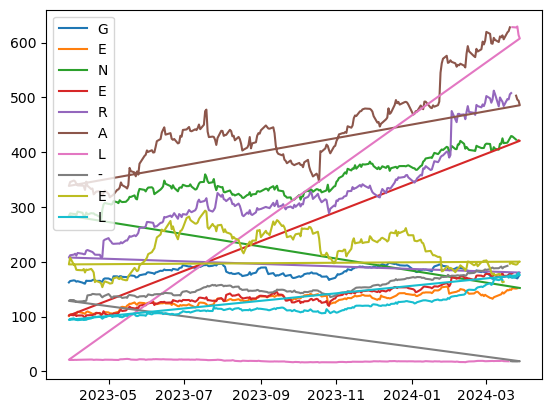

In [54]:
    import matplotlib.pyplot as plt

    plt.plot(df.index[0:250], dfxfs['Close'].iloc[0:250])
    plt.legend('APPLE')
    plt.plot(df.index[251:500], dfxfs['Close'].iloc[251:500])
    plt.legend('GOOGLE')
    plt.plot(df.index[501:750], dfxfs['Close'].iloc[501:750])
    plt.legend('MICROSOFT')
    plt.plot(df.index[751:1000], dfxfs['Close'].iloc[751:1000])
    plt.legend('AMAZON')
    plt.plot(df.index[1001:1250], dfxfs['Close'].iloc[1001:1250])
    plt.legend('META')
    plt.plot(df.index[1251:1500], dfxfs['Close'].iloc[1251:1500])
    plt.legend('NETFLIX')
    plt.plot(df.index[1501:1750], dfxfs['Close'].iloc[1501:1750])
    plt.legend('AMERICAN EXPR')
    plt.plot(df.index[1751:2000], dfxfs['Close'].iloc[1751:2000])
    plt.legend('JP-MORGAN')
    plt.plot(df.index[2001:2250], dfxfs['Close'].iloc[2001:2250])
    plt.legend('TESLA')
    plt.plot(df.index[2251:2500], dfxfs['Close'].iloc[2251:2500])
    plt.legend('GENERAL-ELC')

In [55]:
    df_app = df[df['company_name']==com]
    df_app

,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-03-30,203.380005,208.089996,202.820007,207.839996,207.619705,22608300,META
2023-03-31,207.240005,212.169998,206.770004,211.940002,211.715363,25440300,META
2023-04-03,208.839996,213.490005,208.199997,213.070007,212.844177,17924600,META
2023-04-04,213.389999,216.240005,212.539993,214.720001,214.492416,21026400,META
2023-04-05,214.149994,215.190002,209.940002,211.479996,211.255844,19396600,META
...,...,...,...,...,...,...,...
2024-03-22,507.000000,509.970001,504.339996,509.579987,509.579987,8117000,META
2024-03-25,505.790009,507.220001,500.239990,503.019989,503.019989,8380600,META
2024-03-26,505.130005,510.000000,495.209991,495.890015,495.890015,11205400,META


In [56]:
    df_app_c = pd.DataFrame(df_app['Close'])

In [57]:
    df_app_c

,Close
Date,
2023-03-30,207.839996
2023-03-31,211.940002
2023-04-03,213.070007
2023-04-04,214.720001
2023-04-05,211.479996
...,...
2024-03-22,509.579987
2024-03-25,503.019989
2024-03-26,495.890015


In [58]:
    dfxfs

,Close
Date,
2023-03-30,162.360001
2023-03-31,164.899994
2023-04-03,166.169998
2023-04-04,165.630005
2023-04-05,163.759995
...,...
2024-03-22,175.149994
2024-03-25,173.490005
2024-03-26,173.550003


In [59]:
    df_g = df_app_c
    df_g

,Close
Date,
2023-03-30,207.839996
2023-03-31,211.940002
2023-04-03,213.070007
2023-04-04,214.720001
2023-04-05,211.479996
...,...
2024-03-22,509.579987
2024-03-25,503.019989
2024-03-26,495.890015


In [60]:
    df_mse_a = [df_g,df_g,df_g,df_g,df_g,df_g,df_g,df_g,df_g,df_g]
    df_mse_a = pd.concat(df_mse_a)
    df_mse_a

,Close
Date,
2023-03-30,207.839996
2023-03-31,211.940002
2023-04-03,213.070007
2023-04-04,214.720001
2023-04-05,211.479996
...,...
2024-03-22,509.579987
2024-03-25,503.019989
2024-03-26,495.890015


In [61]:
    dfxfs

,Close
Date,
2023-03-30,162.360001
2023-03-31,164.899994
2023-04-03,166.169998
2023-04-04,165.630005
2023-04-05,163.759995
...,...
2024-03-22,175.149994
2024-03-25,173.490005
2024-03-26,173.550003


In [62]:
    fxc = df_mse_a[0:len(dfxfs)]
    fxv = np.array(fxc['Close'])
    fxv

array([207.83999634, 211.94000244, 213.07000732, ..., 495.89001465,
       493.85998535, 485.57998657])

In [63]:
    fcv = np.array(dfxfs['Close'])

In [64]:
    len(fcv)

2510

In [65]:
    mseallfe = np.zeros(len(dfxfs))

In [66]:
    dfxfs[1:4]

,Close
Date,
2023-03-31,164.899994
2023-04-03,166.169998
2023-04-04,165.630005


In [67]:
    for i in range(0,len(dfxfs)):
        mseallfe[i] = fcv[i]-fxv[i]
        

In [68]:
    mseallfe = pd.DataFrame(mseallfe,columns = ['Close'])
    len(mseallfe)

2510

In [69]:
    fcv = pd.DataFrame(fcv,columns=['Close'])
    len(fcv)

2510

In [70]:
    fcv = np.array(dfxfs)
    mseallfe= np.array(mseallfe)
    final_df = np.zeros(len(dfxfs))

In [71]:
    len(final_df)

2510

In [72]:
    len(mseallfe)

2510

In [73]:
    for i in range(0,len(dfxfs)):
        if (mseallfe[i]>=0):
            final_df[i] = fcv[i]+mseallfe[i]
        else:
            final_df[i] = fcv[i]-mseallfe[i]
    final_df

array([207.83999634, 211.94000244, 213.07000732, ..., 495.89001465,
       493.85998535, 485.57998657])

In [74]:
    sdx = pd.DataFrame(final_df,columns=['Close'])
    sdx

,Close
0,207.839996
1,211.940002
2,213.070007
3,214.720001
4,211.479996
...,...
2505,509.579987
2506,503.019989
2507,495.890015
2508,493.859985


In [75]:
    # plt.plot(final_df)
    # plt.legend('ALL')

In [76]:
    datasetx = sdx[1746:15705]
    # Get the number of rows to train the model on
    training_data_lenx = int(np.ceil( len(datasetx) * .95 ))
    training_data_lenx

726

In [77]:
    datasetx

,Close
1746,491.829987
1747,484.100006
1748,496.980011
1749,496.239990
1750,505.519989
...,...
2505,509.579987
2506,503.019989
2507,495.890015
2508,493.859985


In [78]:
    # Scale the data
    from sklearn.preprocessing import MinMaxScaler
    scaler = MinMaxScaler(feature_range=(-1,1))
    scaled_datax = scaler.fit_transform(datasetx)
    scaled_datax

array([[ 0.86633393],
       [ 0.81558563],
       [ 0.90014449],
       [ 0.89528616],
       [ 0.95621052],
       [ 0.97091654],
       [ 0.98286492],
       [ 0.93979771],
       [ 0.89298853],
       [ 0.87966113],
       [ 0.82530189],
       [-0.99809616],
       [-0.9711791 ],
       [-0.96376048],
       [-0.95292806],
       [-0.9741991 ],
       [-0.94386815],
       [-0.95273111],
       [-0.95863969],
       [-0.95765496],
       [-0.91596637],
       [-0.90848213],
       [-0.92574844],
       [-0.93211662],
       [-0.94649426],
       [-0.96376048],
       [-0.96494225],
       [-0.9655988 ],
       [-1.        ],
       [-0.98785458],
       [-0.79641548],
       [-0.78486079],
       [-0.76608463],
       [-0.79195114],
       [-0.80646011],
       [-0.82950367],
       [-0.8343619 ],
       [-0.83114495],
       [-0.8304885 ],
       [-0.83239234],
       [-0.8146009 ],
       [-0.82759983],
       [-0.79444592],
       [-0.79470848],
       [-0.77061448],
       [-0

In [79]:
    # Create the training data set 
    # Create the scaled training data set
    train_datax = scaled_datax[0:int(training_data_lenx), :]
    # Split the data into x_train and y_train data sets
    x_trainx = []
    y_trainx = []
    for i in range(60, len(train_datax)):
        x_trainx.append(train_datax[i-60:i, 0])
        y_trainx.append(train_datax[i, 0])
        if i<= 61:
            print(x_trainx)
            print(y_trainx)
            print()
            
    # Convert the x_train and y_train to numpy arrays 
    x_trainx, y_trainx = np.array(x_trainx), np.array(y_trainx)

    # Reshape the data
    x_trainx = np.reshape(x_trainx, (x_trainx.shape[0], x_trainx.shape[1], 1))
    # x_train.shape

[array([ 0.86633393,  0.81558563,  0.90014449,  0.89528616,  0.95621052,
        0.97091654,  0.98286492,  0.93979771,  0.89298853,  0.87966113,
        0.82530189, -0.99809616, -0.9711791 , -0.96376048, -0.95292806,
       -0.9741991 , -0.94386815, -0.95273111, -0.95863969, -0.95765496,
       -0.91596637, -0.90848213, -0.92574844, -0.93211662, -0.94649426,
       -0.96376048, -0.96494225, -0.9655988 , -1.        , -0.98785458,
       -0.79641548, -0.78486079, -0.76608463, -0.79195114, -0.80646011,
       -0.82950367, -0.8343619 , -0.83114495, -0.8304885 , -0.83239234,
       -0.8146009 , -0.82759983, -0.79444592, -0.79470848, -0.77061448,
       -0.74199053, -0.74993437, -0.73233978, -0.74271269, -0.72649682,
       -0.70365021, -0.64226624, -0.63911511, -0.62467175, -0.57287301,
       -0.57287301, -0.58088228, -0.58265499, -0.63202466, -0.62559097])]
[-0.6231617038453559]

[array([ 0.86633393,  0.81558563,  0.90014449,  0.89528616,  0.95621052,
        0.97091654,  0.98286492,  0.9

In [80]:
    len(x_trainx)

666

In [81]:
    sdx

,Close
0,207.839996
1,211.940002
2,213.070007
3,214.720001
4,211.479996
...,...
2505,509.579987
2506,503.019989
2507,495.890015
2508,493.859985


In [82]:
    x_trainx.shape[0]

666

In [83]:
    xtrainfinal = np.array(sdx)
    xtrainfinal.shape[1]

1

In [84]:
    xtrainfinal.shape[0]

2510

In [85]:
    from keras.layers import Input, Dense
    from keras.models import Model

In [86]:
    input_imgx = Input(shape=x_trainx.shape[1])
    encodedx = Dense(x_trainx.shape[1], activation='relu')(input_imgx)  # encoding_dim = 32
    decodedx = Dense(1, activation='relu')(encodedx)

    # this model maps an input to its reconstruction
    trfx = Model(input_imgx, decodedx)

    # get the encoder and decoder as seperate models
    # encoder
    encoderx = Model(input_imgx, encodedx)

    # decoder
    encoded_inputx = Input(shape=(x_trainx.shape[1],))  # encoding_dim = 32
    decoder_layerx = trfx.layers[-1]
    decoder = Model(encoded_inputx, decoder_layerx(encoded_inputx))
    trfx.compile(optimizer='adam', loss='mean_squared_error')

In [87]:
    trfx.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 60)]              0         
                                                                 
 dense_2 (Dense)             (None, 60)                3660      
                                                                 
 dense_3 (Dense)             (None, 1)                 61        
                                                                 
Total params: 3,721
Trainable params: 3,721
Non-trainable params: 0
_________________________________________________________________


In [88]:
    historyx = trfx.fit(x_trainx, y_trainx, batch_size=100, epochs=1)

7/7 [==============================] - 0s 1ms/step - loss: 0.4036


In [89]:
    # Create the testing data set
    # Create a new array containing scaled values 
    test_datax = scaled_datax[training_data_lenx - 60: , :]
    # Create the data sets x_test and y_test
    x_testx = []

In [90]:
    y_testx = datasetx[training_data_lenx:len(datasetx)]
    y_testx

,Close
2472,459.410004
2473,454.720001
2474,469.589996
2475,470.000000
2476,468.109985
2477,468.899994
2478,460.119995
2479,473.279999
2480,484.029999
2481,473.320007


In [91]:
    for i in range(60, len(test_datax)):
        x_testx.append(test_datax[i-60:i, 0])
        
    # Convert the data to a numpy array
    x_testx = np.array(x_testx)

    # Reshape the data

In [92]:
    # Get the models predicted price values 
    predictionsx = trfx.predict(x_testx)
    predictionsx

2/2 [==============================] - 0s 1ms/step


array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

In [93]:
    predictionsx = scaler.inverse_transform(predictionsx)

In [94]:
    predictionsx

array([[359.87],
       [359.87],
       [359.87],
       [359.87],
       [359.87],
       [359.87],
       [359.87],
       [359.87],
       [359.87],
       [359.87],
       [359.87],
       [359.87],
       [359.87],
       [359.87],
       [359.87],
       [359.87],
       [359.87],
       [359.87],
       [359.87],
       [359.87],
       [359.87],
       [359.87],
       [359.87],
       [359.87],
       [359.87],
       [359.87],
       [359.87],
       [359.87],
       [359.87],
       [359.87],
       [359.87],
       [359.87],
       [359.87],
       [359.87],
       [359.87],
       [359.87],
       [359.87],
       [359.87]], dtype=float32)

In [95]:
    # Plot the data
    data = sdx['Close']

    # Visualize the data
    len(data)

2510

In [96]:
    data

0       207.839996
1       211.940002
2       213.070007
3       214.720001
4       211.479996
           ...    
2505    509.579987
2506    503.019989
2507    495.890015
2508    493.859985
2509    485.579987
Name: Close, Length: 2510, dtype: float64

In [97]:
    datax = pd.DataFrame(data)
    datax

,Close
0,207.839996
1,211.940002
2,213.070007
3,214.720001
4,211.479996
...,...
2505,509.579987
2506,503.019989
2507,495.890015
2508,493.859985


In [98]:
    datax

,Close
0,207.839996
1,211.940002
2,213.070007
3,214.720001
4,211.479996
...,...
2505,509.579987
2506,503.019989
2507,495.890015
2508,493.859985


In [99]:
    import random as rand
    final_pred = np.zeros(len(predictionsx))
    yx=datax['Close'][0:len(final_pred)].values
    print(yx)
    for i in range (0, len(predictionsx)):
        final_pred[i] = 1.25*predictionsx[i]-((1.2*predictionsx[i]-0.9*yx[i]))

[207.83999634 211.94000244 213.07000732 214.72000122 211.47999573
 216.1000061  214.75       213.8500061  214.         220.3500061
 221.49000549 218.86000061 217.88999939 215.69999695 213.07000732
 212.88999939 212.78999329 207.55000305 209.3999939  238.55999756
 240.32000732 243.17999268 239.24000549 237.02999878 233.52000427
 232.77999878 233.27000427 233.36999512 233.08000183 235.78999329
 233.80999756 238.86000061 238.82000732 242.49000549 246.8500061
 245.63999939 248.32000732 246.74000549]


In [100]:
    valid = pd.DataFrame()

In [101]:
    valid

""


In [102]:
    np.array(data)

array([207.83999634, 211.94000244, 213.07000732, ..., 495.89001465,
       493.85998535, 485.57998657])

In [103]:
    valid = pd.DataFrame(final_pred,columns=['predictions'])

In [104]:
    valid['close app'] = np.array(datax[0:len(final_pred)])

In [105]:
    valid

,predictions,close app
0,205.049469,207.839996
1,208.739471,211.940002
2,209.756470,213.070007
3,211.241470,214.720001
4,208.325470,211.479996
5,212.483475,216.100006
6,211.268463,214.750000
7,210.458481,213.850006
8,210.593475,214.000000
9,216.308472,220.350006


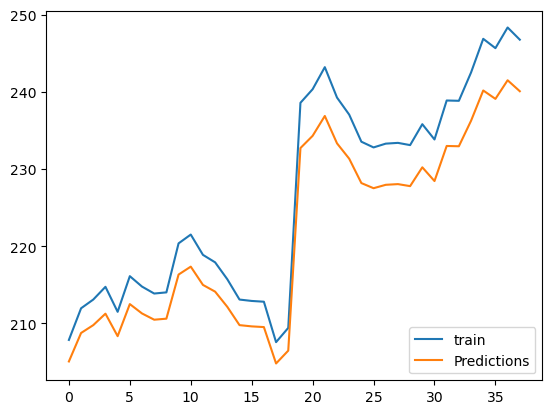

[[1.67048716 2.62498256 2.8320555  ... 6.3710698  6.57803453 6.45682093]
 [0.94840661 1.7890028  2.08099397 ... 6.07458048 6.29130637 6.16445732]
 [1.3843675  1.47767815 1.8203125  ... 5.99028628 6.20995472 6.08140903]
 ...
 [5.588334   5.20859586 5.09896714 ... 2.56330375 3.04146906 2.76957257]
 [5.80012754 5.43520684 5.33024094 ... 2.03924583 2.6150586  2.29314842]
 [5.67622079 5.30278006 5.19513921 ... 2.36231256 2.87411353 2.58467149]]


In [106]:
    plt.figure()
    plt.plot(datax['Close'][0:len(final_pred)].values)
    plt.plot(valid[['predictions']])
    plt.legend(['train', 'Predictions'], loc='lower right')
    plt.show()
    error_main = np.sqrt(np.abs(datax['Close'][0:len(final_pred)].values -valid[['predictions']].values))
    print(error_main)

In [107]:
final_pred

array([205.04946899, 208.73947144, 209.75646973, 211.24147034,
       208.32546997, 212.48347473, 211.26846313, 210.45848083,
       210.59347534, 216.30847168, 217.33447266, 214.96746826,
       214.09446716, 212.12347412, 209.75646973, 209.59446716,
       209.50445557, 204.78846741, 206.45346069, 232.69746399,
       234.28147888, 236.85546875, 233.30947876, 231.32046509,
       228.16146851, 227.49546814, 227.93647766, 228.02645874,
       227.76547241, 230.20446777, 228.42247009, 232.96746826,
       232.93147278, 236.23446655, 240.15847778, 239.06947327,
       241.48147583, 240.05947876])